# 4. より高い精度を出せるハイパーパラメータの探求

In [1]:
# coding: utf-8
'''
    初期設定箇所。このセルは変更せずに実行してください
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #グラフの描画
import os, sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer2

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # Read Test Data

## 4-1. ハイパーパラメータの設定と学習の実行、精度の確認

=== epoch:1, train acc:0.0993333333333, test acc:0.1 ===
=== epoch:2, train acc:0.340116666667, test acc:0.3511 ===
=== epoch:3, train acc:0.559683333333, test acc:0.5773 ===
=== epoch:4, train acc:0.6025, test acc:0.6086 ===
=== epoch:5, train acc:0.64065, test acc:0.648 ===
=== epoch:6, train acc:0.69765, test acc:0.7041 ===
=== epoch:7, train acc:0.717433333333, test acc:0.7241 ===
=== epoch:8, train acc:0.7746, test acc:0.7832 ===
=== epoch:9, train acc:0.789516666667, test acc:0.7954 ===
=== epoch:10, train acc:0.812466666667, test acc:0.8164 ===
=============== Final Test Accuracy ===============
test acc:0.8302


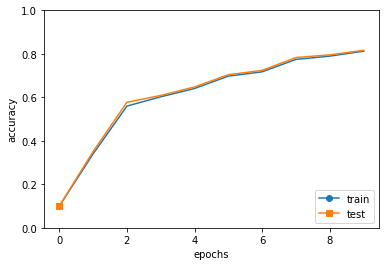

In [2]:
'''
    下記のハイパーパラメータのみを変更してください

    ハイパーパラメータ  説明                        値(例)
    ------------------  --------------------------  -------------------
    hidden_size_list    隠れレイヤーの数とノード数  [50, 100]
    activation          隠れレイヤーの活性化関数    "sigmoid" | "relu"
    optimizer           最適化手法の種類            "SGD" | "Momentum" | "Nesterov" | "AdaGrad" | "RMSprop" | "Adam"
    epochs              学習時間の長さ              10 (大きくすると時間がかかります)
'''
hidden_size_list=[50, 100]
activation="sigmoid"
optimizer="SGD"
epochs=10

'''
    以下は変更しないでください
'''
# 学習==========
network = MultiLayerNetExtend(input_size=784, hidden_size_list=hidden_size_list, output_size=10, activation=activation)
trainer = Trainer2(network, x_train, t_train, x_test, t_test, epochs=epochs, mini_batch_size=100, optimizer=optimizer, optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()